## Preprocessing

In [1]:
!pip install keras-tuner --upgrade

In [2]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# suppress warnings
import warnings
warnings.filterwarnings('ignore')



In [3]:
#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
application_df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
cols_to_drop = ["EIN", "NAME"]
application_df.drop(columns=cols_to_drop, inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [8]:
# Determine the number of unique values in each column.
cols = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL']

for col in cols:
  print(col)
  print(application_df[col].nunique())
  print(application_df[col].value_counts())
  print()

APPLICATION_TYPE
17
APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

AFFILIATION
6
AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64

CLASSIFICATION
71
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

USE_CASE
5
USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64

ORGANIZATION
4
ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation  

In [9]:
application_df.nunique()

,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [10]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
app_type_unique = application_df["APPLICATION_TYPE"].value_counts()
app_type_unique

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [11]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_unique[app_type_unique <500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [12]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_unique =application_df["CLASSIFICATION"].value_counts()
class_unique

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [13]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_unique.loc[class_unique > 1]

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [14]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_unique[class_unique <500].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
Other,1484
C7000,777


### **Other columns**

In [15]:
# Look at AFFILIATION value counts to identify and replace with "Other
afiliations_unique = application_df["AFFILIATION"].value_counts()
afiliations_unique

,count
AFFILIATION,
Independent,18480
CompanySponsored,15705
Family/Parent,64
National,33
Regional,13
Other,4


In [16]:
# Choose a cutoff value and create a list of afiliations to be replaced
# use the variable name `afiliations_to_replace`
afiliations_to_replace = list(afiliations_unique[afiliations_unique <10000].index)


# Replace in dataframe
for cls in afiliations_to_replace:
  application_df['AFFILIATION'] =application_df['AFFILIATION'].replace(cls,"Other")


# Check to make sure replacement was successful
application_df['AFFILIATION'].value_counts()

,count
AFFILIATION,
Independent,18480
CompanySponsored,15705
Other,114


In [17]:
# Look at USE_CASE value counts to identify and replace with "Other
use_case_unique = application_df["USE_CASE"].value_counts()
use_case_unique

,count
USE_CASE,
Preservation,28095
ProductDev,5671
CommunityServ,384
Heathcare,146
Other,3


In [18]:
# Choose a cutoff value and create a list of USE CASE to be replaced
# use the variable name `afiliations_to_replace`
use_case_to_replace = list(use_case_unique[use_case_unique <500].index)


# Replace in dataframe
for cls in use_case_to_replace:
  application_df['USE_CASE'] =application_df['USE_CASE'].replace(cls,"Other")


# Check to make sure replacement was successful
application_df['USE_CASE'].value_counts()

,count
USE_CASE,
Preservation,28095
ProductDev,5671
Other,533


In [19]:
# Look at ORGANIZATION value counts to identify and replace with "Other
organizations_unique = application_df["ORGANIZATION"].value_counts()
organizations_unique

,count
ORGANIZATION,
Trust,23515
Association,10255
Co-operative,486
Corporation,43


In [20]:
# Choose a cutoff value and create a list of organizations to be replaced
# use the variable name `afiliations_to_replace`
organizations_to_replace = list(organizations_unique[organizations_unique <500].index)


# Replace in dataframe
for cls in organizations_to_replace:
   application_df['ORGANIZATION'] =application_df['ORGANIZATION'].replace(cls,"Other")


# Check to make sure replacement was successful
application_df['ORGANIZATION'].value_counts()

,count
ORGANIZATION,
Trust,23515
Association,10255
Other,529


In [21]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df2 = pd.get_dummies(application_df)
application_df2.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False


In [22]:
# Split our preprocessed data into our features and target arrays
X = application_df2.drop('IS_SUCCESSFUL', axis=1)
y = application_df2['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape,X_test.shape)

(27439, 38) (6860, 38)


In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [24]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh', 'sigmoid'])

# Allow kerastuner to decide number of neurons in first layer
    # Set input_dim to 38 to match the number of features in your dataset
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=38)) # Changed input_dim to 38

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="relu"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [25]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

Reloading Tuner from ./untitled_project/tuner0.json


In [26]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(27439, 38)
(6860, 38)


In [27]:
# Run the kerastuner search for best hyperparameters
# activation function and layers off
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

In [28]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'sigmoid',
 'first_units': 9,
 'num_layers': 3,
 'units_0': 9,
 'units_1': 3,
 'units_2': 3,
 'units_3': 9,
 'units_4': 3,
 'units_5': 9,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0021'}

In [29]:
# Print the best hyperparameters
print("Best Hyperparameters:")
for key, value in best_hyper.values.items():
    print(f"{key}: {value}")


Best Hyperparameters:
activation: sigmoid
first_units: 9
num_layers: 3
units_0: 9
units_1: 3
units_2: 3
units_3: 9
units_4: 3
units_5: 9
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0021


In [30]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 2s - 12ms/step - accuracy: 0.7289 - loss: 0.5634
Loss: 0.563437283039093, Accuracy: 0.728863000869751


In [31]:
# Export our model to HDF5 file
best_model.save('/content/Model_h5/AlphabetSoupCharity_Optimization_2_KERAS.h5')

{'Test Loss': 0.563437283039093, 'Test Accuracy': 0.728863000869751}


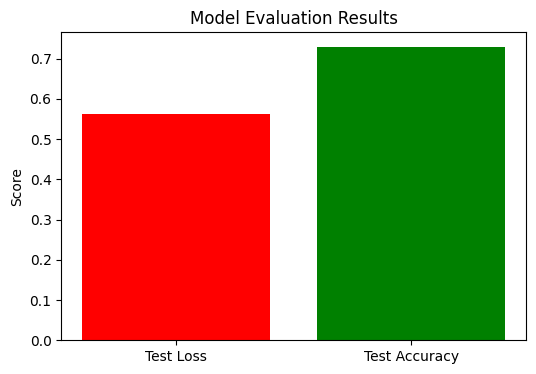

In [32]:
# Create output folder
output = '/content/output'
os.makedirs(output, exist_ok=True)

# Store evaluation results in a dictionary
evaluation_results = {
    'Test Loss': model_loss,
    'Test Accuracy': model_accuracy
}

# Print the results
print(evaluation_results)

# Visualize the results using a bar chart
plt.figure(figsize=(6,4))
plt.bar(evaluation_results.keys(), evaluation_results.values(), color=['red', 'green'])
plt.title('Model Evaluation Results')
plt.ylabel('Score')
# Save the graph
plt.savefig(os.path.join(output, "Model_Evaluation_Keras.png"))

# Display
plt.show()


Epoch 1/20
858/858 - 6s - 7ms/step - accuracy: 0.7306 - loss: 0.5541 - val_accuracy: 0.7238 - val_loss: 0.5623
Epoch 2/20
858/858 - 7s - 8ms/step - accuracy: 0.7305 - loss: 0.5533 - val_accuracy: 0.7262 - val_loss: 0.5615
Epoch 3/20
858/858 - 4s - 4ms/step - accuracy: 0.7306 - loss: 0.5530 - val_accuracy: 0.7274 - val_loss: 0.5609
Epoch 4/20
858/858 - 5s - 6ms/step - accuracy: 0.7317 - loss: 0.5523 - val_accuracy: 0.7249 - val_loss: 0.5610
Epoch 5/20
858/858 - 4s - 5ms/step - accuracy: 0.7322 - loss: 0.5513 - val_accuracy: 0.7270 - val_loss: 0.5600
Epoch 6/20
858/858 - 2s - 2ms/step - accuracy: 0.7316 - loss: 0.5511 - val_accuracy: 0.7268 - val_loss: 0.5597
Epoch 7/20
858/858 - 3s - 3ms/step - accuracy: 0.7309 - loss: 0.5515 - val_accuracy: 0.7268 - val_loss: 0.5591
Epoch 8/20
858/858 - 2s - 2ms/step - accuracy: 0.7309 - loss: 0.5507 - val_accuracy: 0.7277 - val_loss: 0.5591
Epoch 9/20
858/858 - 2s - 3ms/step - accuracy: 0.7320 - loss: 0.5503 - val_accuracy: 0.7278 - val_loss: 0.5587
E

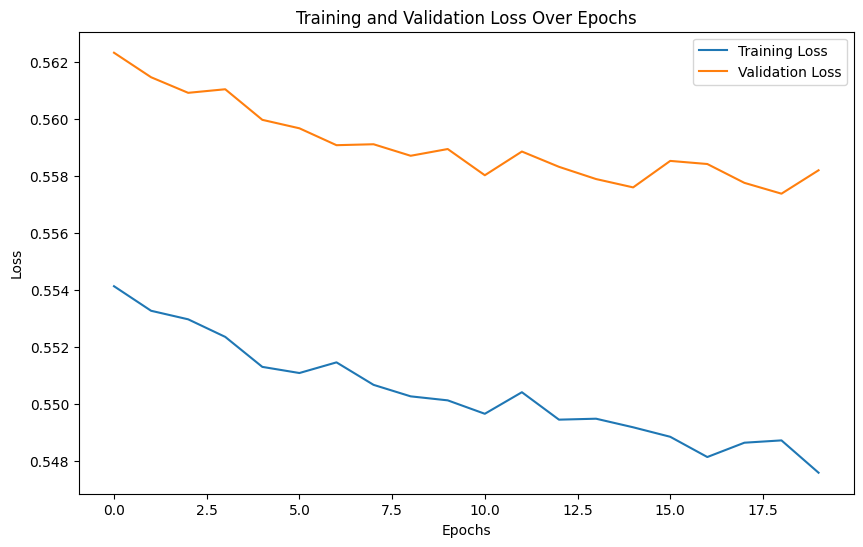

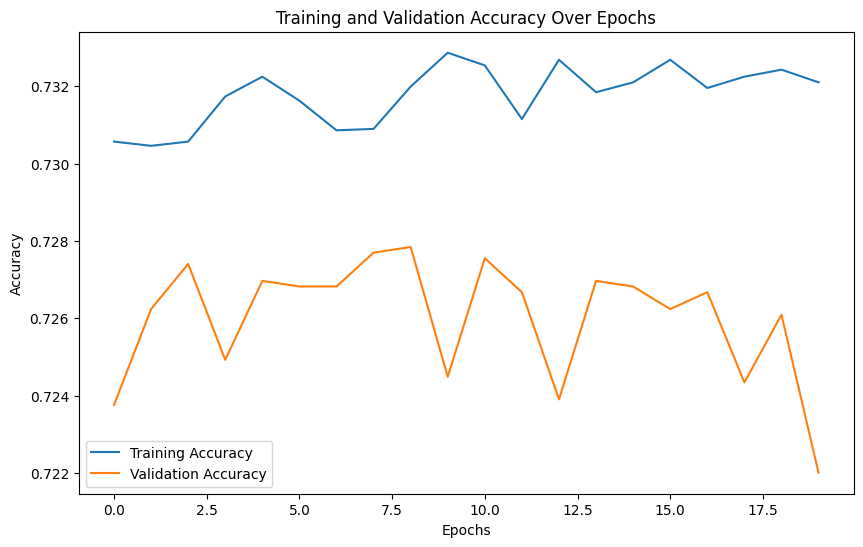

In [33]:
# Retrain the best model to capture the history
history = best_model.fit(X_train_scaled, y_train,
                         epochs=20,
                         validation_data=(X_test_scaled, y_test),
                         verbose=2)

# Evaluate the model
model_loss, model_accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Plot the training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Save the accuracy plot in the output folder
plt.savefig(os.path.join(output, "Training_Validation_LossKeras.png"))
plt.show()

# Plot the training accuracy and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Save the accuracy plot in the output folder
plt.savefig(os.path.join(output, "Training_Validation_AccuracyKeras.png"))

#display
plt.show()
